In [1]:
import pandas as pd
import math

In [2]:
df = pd.read_csv("pres.elect16.results.csv").dropna()

df = df[df["votes"]>0]
df["fist_digit"] = df["votes"].astype(str).str.slice(start=0, stop=1)

In [3]:
ben = pd.concat([df[df["lead"] == "Hillary Clinton"]["fist_digit"].value_counts(normalize=True).sort_index(),
                df[df["lead"] == "Donald Trump"]["fist_digit"].value_counts(normalize=True).sort_index()], axis=1)

ben.columns = ["Hillary Clinton", "Donald Trump"]

ben["Benford"] = [math.log10(1 + 1/n) for n in range(1,10)]


In [4]:
ben

,Hillary Clinton,Donald Trump,Benford
1,0.302605,0.306100,0.301030
2,0.180260,0.173201,0.176091
3,0.116175,0.128581,0.124939
4,0.099726,0.099863,0.096910
5,0.086018,0.078478,0.079181
6,0.067512,0.065730,0.066947
7,0.056203,0.056134,0.057992
8,0.043180,0.050994,0.051153
9,0.048321,0.040918,0.045757


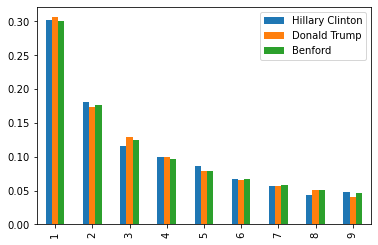

In [5]:
ben.plot.bar();